In [1]:
import getpass
print(getpass.getuser())

joan_


In [2]:
from qiskit import *

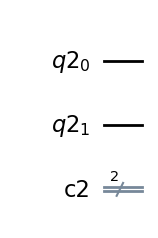

In [5]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
#circuit.draw()
circuit.draw(output='mpl')

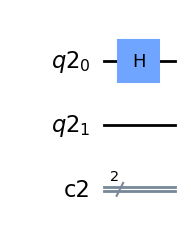

In [6]:
circuit.h(qr[0])
circuit.draw(output='mpl')

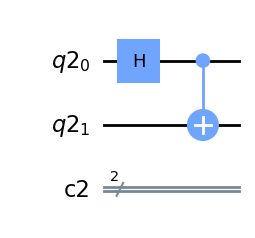

In [7]:
circuit.cx(qr[0],qr[1])
circuit.draw(output='mpl')

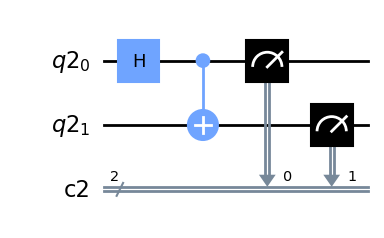

In [8]:
circuit.measure(qr, cr)
circuit.draw(output='mpl')

In [9]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()

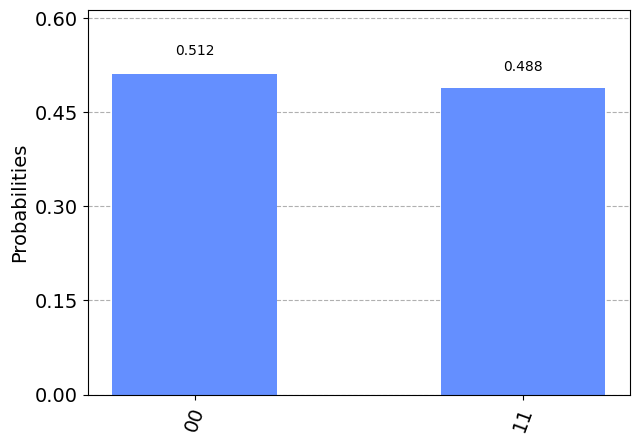

In [10]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [12]:
counts = result.get_counts(circuit)
print(counts) 

{'00': 524, '11': 500}


In [14]:
#IBMQ.save_account('ec92f3208809166b2c8c8388e4642647c08c8b3c335be92c6b3e234c907c74434ae200894caeb19a6a72804df7cf49c9c54199278b754b98d3ef04e2445f129e')
IBMQ.load_account()

configrc.store_credentials:WARNING:2022-10-02 19:18:45,544: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-10-02 19:18:46,446: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [16]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-online')>]

In [17]:
provider = IBMQ.get_provider(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-online')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-online')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-online')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-online')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-online')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-online')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-online')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-online')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-online')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q-education', group='lamar-un

In [19]:
qcomp = provider.get_backend('ibmq_manila')
job = execute(circuit, backend=qcomp, shots=1024)


In [20]:
from qiskit.tools.monitor import job_monitor

In [21]:
job_monitor(job)

Job Status: job has successfully run


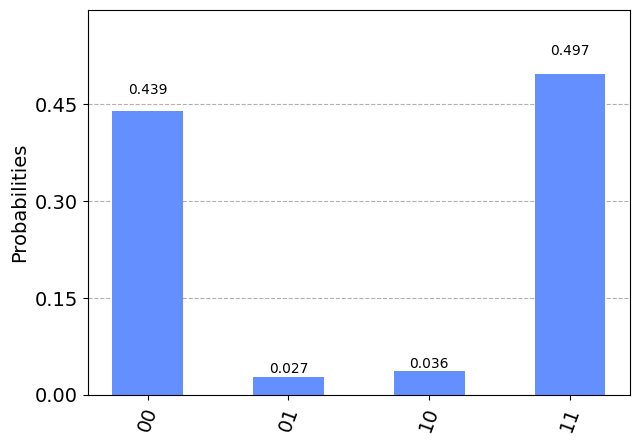

In [22]:
result = job.result()
plot_histogram(result.get_counts(circuit))

In [23]:
counts = result.get_counts(circuit)
print(counts)

{'00': 450, '01': 28, '10': 37, '11': 509}
